In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Simulating the conveyor (sequentially triggered source pairs)

In [8]:
# We define lists and initialize lists 
dt=0.0001                 # time-step
u=6                       
x0=0
y0=0
x11=0.5
y11=0
a1=3.5
a2=5.5
N=3000000                # number of iterations to be made
m=1000000                # parameter determining delay time
y=np.zeros(N)
x=np.zeros(N)
x[0]=0.25
y[0]=1
y1=np.zeros(N)         # lists for storing data for the activations
x1=np.zeros(N)
y2=np.zeros(N)
x2=np.zeros(N)
x3=np.zeros(N)
y3=np.zeros(N)
t=np.zeros(N)
t1=np.zeros(N)
t2=np.zeros(N) 
t[0]=dt                # list to store time data points
t1[m]=dt
t2[2*m]=dt
ls = np.sqrt((x0 - x11)**2 + (y0 - y11)**2)        #legnth scale
u = u/ls

In [9]:
# generating time points 
for i in range(1,N):
    t[i] = i*dt
    if i > m:
        t1[i]= (i-m)*dt
    if i > 2*m:
        t2[i] = (i-2*m)*dt

In [10]:
#generating the numerical solution
for i in range(1,N):
    u = 12
    t[i]=i*dt
    x[i]=x[i-1]+(dt*u/(4*t[i-1])**2)*((x[i-1]-x0)*np.exp((-(x[i-1]-x0)**2 -(y[i-1]-y0)**2)/(4*t[i-1])) + \
                                   (x[i-1]-x11)*np.exp((-(x[i-1]-x11)**2 -(y[i-1]-y11)**2)/(4*t[i-1])))

    y[i]=y[i-1]+(dt*u/(4*t[i-1])**2)*((y[i-1]-y0)*np.exp((-(x[i-1]-x0)**2 -(y[i-1]-y0)**2)/(4*t[i-1])) + \
                                   (y[i-1]-y11)*np.exp((-(x[i-1]-x11)**2 -(y[i-1]-y11)**2)/(4*t[i-1])))
    if i > m:             # for second activation
        u = 12
        x1[m] = x[m-1]
        y1[m] = y[m-1]
        x1[i]=x1[i-1]+(dt*u/(4*t1[i-1])**2)*((x1[i-1]-x0)*np.exp((-(x1[i-1]-x0)**2 -(y1[i-1]-a1)**2)/(4*t1[i-1])) + \
                                   (x1[i-1]-x11)*np.exp((-(x1[i-1]-x11)**2 -(y1[i-1]-a1)**2)/(4*t1[i-1])))
    
        y1[i]=y1[i-1]+(dt*u/(4*t1[i-1])**2)*((y1[i-1]-a1)*np.exp((-(x1[i-1]-x0)**2 -(y1[i-1]-a1)**2)/(4*t1[i-1])) + \
                                   (y1[i-1]-a1)*np.exp((-(x1[i-1]-x11)**2 -(y1[i-1]-a1)**2)/(4*t1[i-1])))
    
    if i > 2*m:                 # for third activation
        u = 12 
        x2[2*m] = x1[2*m -1]
        y2[2*m] = y1[2*m -1]
        x2[i]=x2[i-1]+(dt*u/(4*t2[i-1])**2)*((x2[i-1]-x0)*np.exp((-(x2[i-1]-x0)**2 -(y2[i-1]-a2)**2)/(4*t2[i-1])) + \
                                   (x2[i-1]-x11)*np.exp((-(x2[i-1]-x11)**2 -(y2[i-1]-a2)**2)/(4*t2[i-1])))
    
        y2[i]=y2[i-1]+(dt*u/(4*t2[i-1])**2)*((y2[i-1]-a2)*np.exp((-(x2[i-1]-x0)**2 -(y2[i-1]-a2)**2)/(4*t2[i-1])) + \
                                   (y2[i-1]-a2)*np.exp((-(x2[i-1]-x11)**2 -(y2[i-1]-a2)**2)/(4*t2[i-1])))


In [11]:
#merging data from the three subsequent activations
for i in range(N):
    if i<m:
        y3[i]=y[i] 
    elif m<=i<2*m:
        y3[i]=y1[i]
    else:
        y3[i]=y2[i]

Text(0, 0.5, 'y')

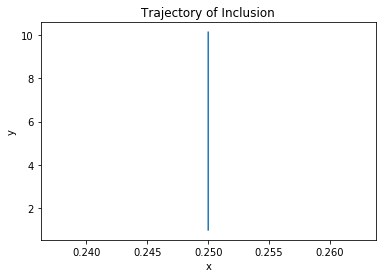

In [12]:
#plotting trajectory
plt.plot(x,y3)
plt.title('Trajectory of Inclusion')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('M5.pdf')

Text(0, 0.5, 'y')

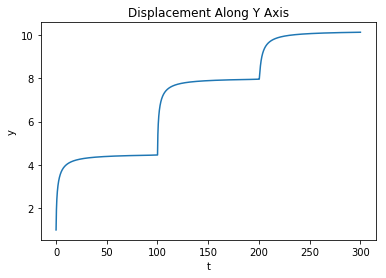

In [13]:
# plotting displacement
plt.plot(t,y3)
plt.title('Displacement Along Y Axis')
plt.xlabel('t')
plt.ylabel('y')
#plt.savefig('M6.pdf')

### Simulating the conveyor with a bad activation protocol.

In [34]:
# We define lists and initialize lists 
dt=0.0001                 # time-step
u=6                       
x0=0
y0=0
x11=0.5
y11=0
a1=3.5
a2=7.5
N=3000000                # number of iterations to be made
m=1000000                # parameter determining delay time
y=np.zeros(N)
x=np.zeros(N)
x[0]=0.25
y[0]=1
y1=np.zeros(N)         # lists for storing data for the activations
x1=np.zeros(N)
y2=np.zeros(N)
x2=np.zeros(N)
x3=np.zeros(N)
y3=np.zeros(N)
t=np.zeros(N)
t1=np.zeros(N)
t2=np.zeros(N) 
t[0]=dt                # list to store time data points
t1[m]=dt
t2[2*m]=dt
ls = np.sqrt((x0 - x11)**2 + (y0 - y11)**2)        #legnth scale
u = u/ls

In [35]:
# generating time points 
for i in range(1,N):
    t[i] = i*dt
    if i > m:
        t1[i]= (i-m)*dt
    if i > 2*m:
        t2[i] = (i-2*m)*dt

In [37]:
#generating the numerical solution
for i in range(1,N):
    u = 12
    t[i]=i*dt
    x[i]=x[i-1]+(dt*u/(4*t[i-1])**2)*((x[i-1]-x0)*np.exp((-(x[i-1]-x0)**2 -(y[i-1]-y0)**2)/(4*t[i-1])) + \
                                   (x[i-1]-x11)*np.exp((-(x[i-1]-x11)**2 -(y[i-1]-y11)**2)/(4*t[i-1])))

    y[i]=y[i-1]+(dt*u/(4*t[i-1])**2)*((y[i-1]-y0)*np.exp((-(x[i-1]-x0)**2 -(y[i-1]-y0)**2)/(4*t[i-1])) + \
                                   (y[i-1]-y11)*np.exp((-(x[i-1]-x11)**2 -(y[i-1]-y11)**2)/(4*t[i-1])))
    if i > m:             # for second activation
        u = 5
        x1[m] = x[m-1]
        y1[m] = y[m-1]
        x1[i]=x1[i-1]+(dt*u/(4*t1[i-1])**2)*((x1[i-1]-x0)*np.exp((-(x1[i-1]-x0)**2 -(y1[i-1]-a1)**2)/(4*t1[i-1])) + \
                                   (x1[i-1]-x11)*np.exp((-(x1[i-1]-x11)**2 -(y1[i-1]-a1)**2)/(4*t1[i-1])))
    
        y1[i]=y1[i-1]+(dt*u/(4*t1[i-1])**2)*((y1[i-1]-a1)*np.exp((-(x1[i-1]-x0)**2 -(y1[i-1]-a1)**2)/(4*t1[i-1])) + \
                                   (y1[i-1]-a1)*np.exp((-(x1[i-1]-x11)**2 -(y1[i-1]-a1)**2)/(4*t1[i-1])))
    
    if i > 2*m:                 # for third activation
        u = 5 
        x2[2*m] = x1[2*m -1]
        y2[2*m] = y1[2*m -1]
        x2[i]=x2[i-1]+(dt*u/(4*t2[i-1])**2)*((x2[i-1]-x0)*np.exp((-(x2[i-1]-x0)**2 -(y2[i-1]-a2)**2)/(4*t2[i-1])) + \
                                   (x2[i-1]-x11)*np.exp((-(x2[i-1]-x11)**2 -(y2[i-1]-a2)**2)/(4*t2[i-1])))
    
        y2[i]=y2[i-1]+(dt*u/(4*t2[i-1])**2)*((y2[i-1]-a2)*np.exp((-(x2[i-1]-x0)**2 -(y2[i-1]-a2)**2)/(4*t2[i-1])) + \
                                   (y2[i-1]-a2)*np.exp((-(x2[i-1]-x11)**2 -(y2[i-1]-a2)**2)/(4*t2[i-1])))


In [38]:
#merging data from the three subsequent activations
for i in range(N):
    if i<m:
        y3[i]=y[i] 
    elif m<=i<2*m:
        y3[i]=y1[i]
    else:
        y3[i]=y2[i]

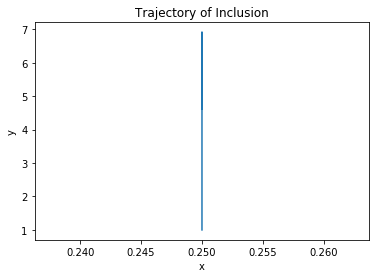

In [42]:
#plotting trajectory
plt.plot(x,y3)
plt.title('Trajectory of Inclusion')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('M5.pdf')

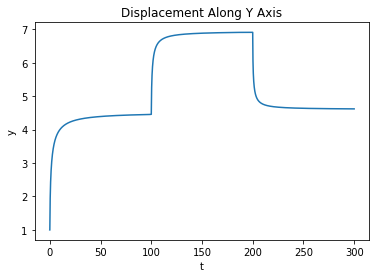

In [41]:
# plotting displacement
plt.plot(t,y3)
plt.title('Displacement Along Y Axis')
plt.xlabel('t')
plt.ylabel('y')
#plt.savefig('M6.pdf')